In [1]:
from elasticsearch import Elasticsearch

# 連接 Elasticsearch（無需帳號密碼）
es = Elasticsearch("http://localhost:9200")

# 測試連線
if es.ping():
    print("✅ 成功連接 Elasticsearch")
else:
    print("❌ 連接失敗")


✅ 成功連接 Elasticsearch


In [2]:
index_name = "ig_data"

# 如果索引已經存在，則刪除並重新建立
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)

es.indices.create(index=index_name, body={
    "settings": {
        "number_of_shards": 1,
        "number_of_replicas": 0
    },
    "mappings": {
        "properties": {
            "content": {"type": "text"},
            "creation_timestamp": {"type": "date"}
        }
    }
})

print(f"✅ 索引 '{index_name}' 已建立")


✅ 索引 'ig_data' 已建立


In [3]:
import json
json_file='ig_data.json'

# 假設你的 JSON 檔案名稱為 'account_information.json'
with open(json_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [10]:
import datetime


for i in data:
    # 要插入的文本資料
    doc={}
    # 讀取data資料
    doc["content"]=i["title"]
    doc["datetime"]=i["creation_timestamp"]
    doc["timestamp"]=datetime.datetime.now()
    doc["media"]=i["media"]

    # 插入文件（Elasticsearch 會自動生成 ID）
    res = es.index(index=index_name, body=doc)
    print(f"✅ 文本已寫入，ID: {res['_id']}")




✅ 文本已寫入，ID: liBMKJUBpDrTwL_b-wzs
✅ 文本已寫入，ID: lyBMKJUBpDrTwL_b_Awb
✅ 文本已寫入，ID: mCBMKJUBpDrTwL_b_Awe
✅ 文本已寫入，ID: mSBMKJUBpDrTwL_b_Awh
✅ 文本已寫入，ID: miBMKJUBpDrTwL_b_Awk
✅ 文本已寫入，ID: myBMKJUBpDrTwL_b_Awm
✅ 文本已寫入，ID: nCBMKJUBpDrTwL_b_AxN
✅ 文本已寫入，ID: nSBMKJUBpDrTwL_b_AxQ
✅ 文本已寫入，ID: niBMKJUBpDrTwL_b_AxS
✅ 文本已寫入，ID: nyBMKJUBpDrTwL_b_AxU
✅ 文本已寫入，ID: oCBMKJUBpDrTwL_b_AxX
✅ 文本已寫入，ID: oSBMKJUBpDrTwL_b_AxZ
✅ 文本已寫入，ID: oiBMKJUBpDrTwL_b_Axb
✅ 文本已寫入，ID: oyBMKJUBpDrTwL_b_Axd
✅ 文本已寫入，ID: pCBMKJUBpDrTwL_b_Axf
✅ 文本已寫入，ID: pSBMKJUBpDrTwL_b_Axh
✅ 文本已寫入，ID: piBMKJUBpDrTwL_b_Axj
✅ 文本已寫入，ID: pyBMKJUBpDrTwL_b_Axl
✅ 文本已寫入，ID: qCBMKJUBpDrTwL_b_Axn
✅ 文本已寫入，ID: qSBMKJUBpDrTwL_b_Axp
✅ 文本已寫入，ID: qiBMKJUBpDrTwL_b_Axr
✅ 文本已寫入，ID: qyBMKJUBpDrTwL_b_Axt
✅ 文本已寫入，ID: rCBMKJUBpDrTwL_b_Axv
✅ 文本已寫入，ID: rSBMKJUBpDrTwL_b_Axx
✅ 文本已寫入，ID: riBMKJUBpDrTwL_b_Axz
✅ 文本已寫入，ID: ryBMKJUBpDrTwL_b_Ax0
✅ 文本已寫入，ID: sCBMKJUBpDrTwL_b_Ax2
✅ 文本已寫入，ID: sSBMKJUBpDrTwL_b_Ax4
✅ 文本已寫入，ID: siBMKJUBpDrTwL_b_Ax7
✅ 文本已寫入，ID: syBMKJUBpDrTwL_b_Ax8
✅ 文本已寫入，ID

In [ ]:
es.indices.delete(index=index_name)
print(f"🗑️ 索引 '{index_name}' 已刪除")


🗑️ 索引 'ig_data' 已刪除


In [6]:
query = {
    "query": {
        "match": {
            "content": "麵"
        }
    }
}

response = es.search(index=index_name, body=query)

for hit in response["hits"]["hits"]:
    print(hit['_id'])

# print(response["hits"]["hits"])

# print("🔍 搜索結果：")
# for hit in response["hits"]["hits"]:
#     print(f"📄 {hit['_source']['content']} (ID: {hit['_id']})")


eSwHE5UBfT7d_IY-Vbdr
kywHE5UBfT7d_IY-Ura7
JSwHE5UBfT7d_IY-UbZm
nSwHE5UBfT7d_IY-T7Wh
mSwHE5UBfT7d_IY-T7WU
fCwHE5UBfT7d_IY-UrZ2
XSwHE5UBfT7d_IY-TrW9
SiwHE5UBfT7d_IY-UbbY
YywHE5UBfT7d_IY-UrYk
MiwHE5UBfT7d_IY-TrUS


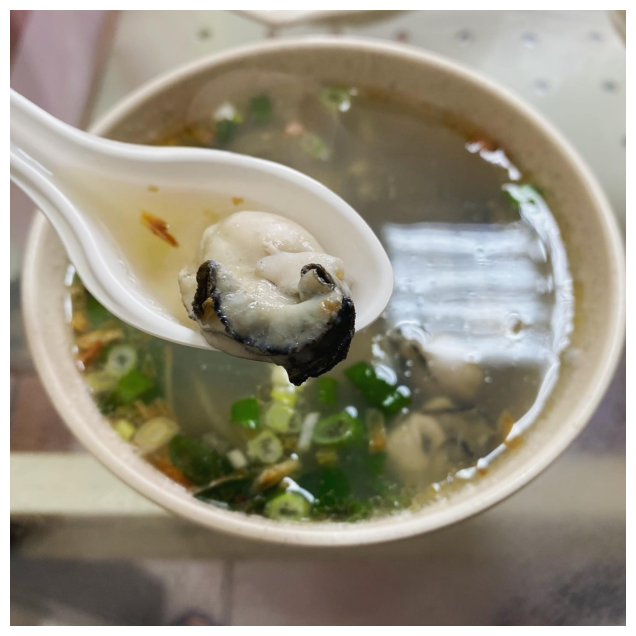

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 讀取影像檔案
image_path = '../media/posts/202104/176653429_1111892232642992_2263279759049249959_n_17903591488883399.jpg'
img = mpimg.imread(image_path)

# 設定圖片大小
plt.figure(figsize=(10, 8))

# 顯示圖片
plt.imshow(img)
plt.axis('off')  # 關閉座標軸
plt.show()